# Colocate and RTC the PBand

Colocate the LBand with the PBand and convert the PBand in gamma-naught

_time 2m_

_input: PBand and LBand from N1_

## 1. Import modules

In [1]:
import plant
import gdal
import cartopy
from os import path
import numpy as np

from IPython.display import IFrame

## 2. Global variables

In [2]:
from config import *

## 3. Convert the PBand to gamma-naught and geocode

In [3]:
PHV_intensity = plant.read_image(file_PHV_slant_range).image
_ = plant.display(PHV_intensity, hist=True, db=True, nbins=20, **options)

opening: /home/croce/ml/dat/pband/afrisar_dlr_T2-0_SLC_HV.tiff (GDAL: GTiff) 


<Figure size 800x600 with 1 Axes>

In [4]:
# Process ESA P-band data
PHV_intensity = plant.read_image(file_PHV_slant_range).image
pband_inc_image = plant.read_image(file_pband_inc).image

# Slant range to sigma
plant.save_image(np.absolute(PHV_intensity)**2 * np.sin(pband_inc_image), 
                 output_file=file_PHV_sigma, 
                 force=True)

# Sigma to gamma
PHV_sigma = plant.read_image(file_PHV_sigma).image
plant.save_image(PHV_sigma / np.cos(pband_inc_image), 
                 output_file=file_PHV_gamma, 
                 force=True)

del PHV_intensity
del pband_inc_image
del PHV_sigma

# Geocode
_ = plant.geocode(file_PHV_gamma, output_file=file_PHV_geocoded, 
                  backward_geocoding_x=file_pband_rg,
                  backward_geocoding_y=file_pband_az,
                  **options)

opening: /home/croce/ml/dat/pband/afrisar_dlr_T2-0_SLC_HV.tiff (GDAL: GTiff) 
opening: /home/croce/ml/dat/pband/afrisar_dlr_T2-0_inc.tiff (GDAL: GTiff) 
saving band 0: MEM:139986697282896
## file saved: /home/croce/ml/dat/pband/output/afrisar_dlr_T2-0_SLC_hv_sigma.tiff (GDAL:GTiff)
opening: /home/croce/ml/dat/pband/output/afrisar_dlr_T2-0_SLC_hv_sigma.tiff (GDAL: GTiff) 
saving band 0: MEM:139986697586576
## file saved: /home/croce/ml/dat/pband/output/afrisar_dlr_T2-0_SLC_HV_gamma.tiff (GDAL:GTiff)


## 4. Change coordinate representation and visualize the data

In [5]:
_ = plant.mosaic(file_PHV_geocoded,
                 output_file=file_PHV_warp_geocoded,
                 out_projection='wgs84',
                 **options)

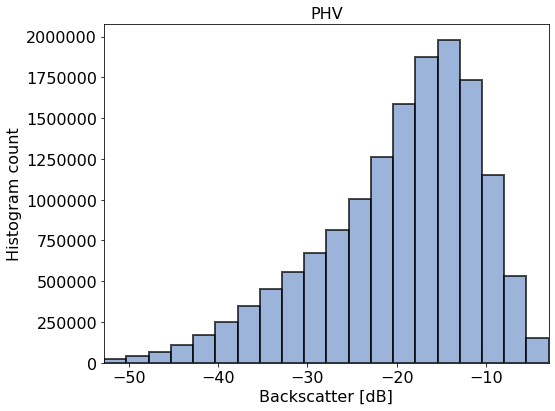

In [6]:
_ = plant.display(file_PHV_warp_geocoded, 
                  db=True, 
                  hist=True, 
                  nbins=20,
                  title='PHV',
                  no_grid=True,
                  label_x='Backscatter [dB]',
                  background_color='white',
                  **options)

In [7]:
_ = plant.display(file_PHV_warp_geocoded, 
                  db=True, 
                  background_color='white', 
                  title='PHV',
                  cartopy=True,
                  plot_size_x=9, 
                  plot_size_y=9,
                  colorbar_label='Backscatter [dB]', 
                  **options)

## 5. Colocate the LBand with the PBand

In [8]:
# Co-locate LBand
_ = plant.mosaic(file_LHH_gamma,
                 output_file=file_LHH_gamma_colo,
                 bbox_file=file_PHV_warp_geocoded,
                 #db=True,
                 **options)
_ = plant.mosaic(file_LHV_gamma,
                 output_file=file_LHV_gamma_colo,
                 bbox_file=file_PHV_warp_geocoded,
                 #db=True,
                 **options)
_ = plant.mosaic(file_LVV_gamma,
                 output_file=file_LVV_gamma_colo,
                 bbox_file=file_PHV_warp_geocoded,
                 #db=True,
                 **options)

In [9]:
_ = plant.mosaic(file_LHH_gamma_colo,
                 output_file=file_LHH_gamma_colo_40,
                 step_m=40,
                 interp='average',
                 **options)
_ = plant.mosaic(file_LHV_gamma_colo,
                 output_file=file_LHV_gamma_colo_40,
                 step_m=40,
                 interp='average',
                 **options)
_ = plant.mosaic(file_LVV_gamma_colo,
                 output_file=file_LVV_gamma_colo_40,
                 step_m=40,
                 interp='average',
                 **options)
_ = plant.mosaic(file_PHV_warp_geocoded,
                 output_file=file_PHV_warp_geocoded_40,
                 step_m=40,
                 interp='average',
                 **options)

In [10]:
_ = plant.util(file_LHV_gamma_colo, file_PHV_warp_geocoded, cmap='Greens', background_color='white', slide_compare=True, output_file='LP_slider.html', **options)

In [1]:
#IFrame(src='LP_slider.html', width=700, height=700)

Share the results with the MAAP: LBand and PBand colocated and gamma-naught corrected